In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv('Amazon Sales data.csv')

In [65]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [66]:
missing_values=data.isnull().sum()
print("Missing_values:\n", missing_values)

Missing_values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [67]:
from datetime import datetime
data["Order Date"] = pd.to_datetime(data["Order Date"])
print(data["Order Date"].dtype)

datetime64[ns]


In [68]:
data["year"] = data["Order Date"].dt.year
data["month"] = data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [69]:
region = data["Region"].nunique()
print("Number of Region",region)

Number of Region 7


In [70]:
country = data["Country"].nunique()
print("Number of Country",country)

Number of Country 76


In [71]:
itemtype = data['Item Type'].nunique()
print("Number of Item Type",itemtype)
      

Number of Item Type 12


In [72]:
units_sold = data["Units Sold"].sum()
print("Total Unit sold",units_sold)

Total Unit sold 512871


In [73]:
unit_price = data["Unit Price"].sum()
print("Total Unit Price",unit_price)

Total Unit Price 27676.13


In [74]:
unit_cost = data["Unit Cost"].sum()
print("Total Unit Cost",unit_cost)

Total Unit Cost 19104.8


In [75]:
total_revenue = data["Total Revenue"].sum()
print("Total Revenue",total_revenue)


Total Revenue 137348768.31


In [76]:
total_cost = data["Total Cost"].sum()
print("Total Cost",total_cost)

Total Cost 93180569.91000001


In [77]:
total_profit = data["Total Profit"].sum()
print("Total Profit",total_profit)

Total Profit 44168198.39999999


In [78]:
group_by=data.groupby(["Region","Sales Channel"])["Total Profit"].sum()
print(group_by)

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64


In [79]:
#Asia,Central America and the Caribbean,Europe,Sub-Saharan Africa are having more proffit in offline other are having more profit in online
#North America only have offline option

Text(0, 0.5, 'Total Revenue')

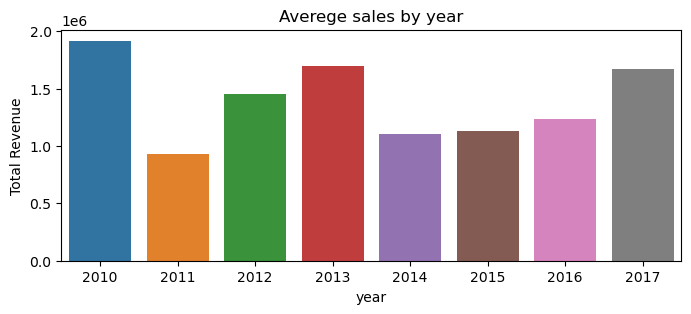

In [235]:
#year wise sales 
year_sales = data.groupby('year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values)
plt.title("Averege sales by year")
plt.xlabel("year")
plt.ylabel("Total Revenue") 


Text(0.5, 1.0, 'Averege profit in Region wise')

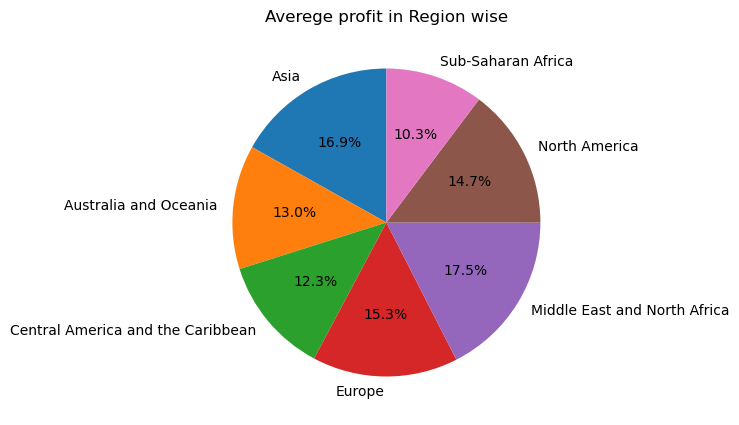

In [104]:
#Total profit in region wise pie chart
plt.figure(figsize=(5,5))
region_total = data.groupby("Region")["Total Profit"].mean()
plt.pie(region_total, startangle=90, labels = region_total.index, autopct = "%1.1f%%")
plt.title("Averege profit in Region wise")

totalrevenue_itemtype


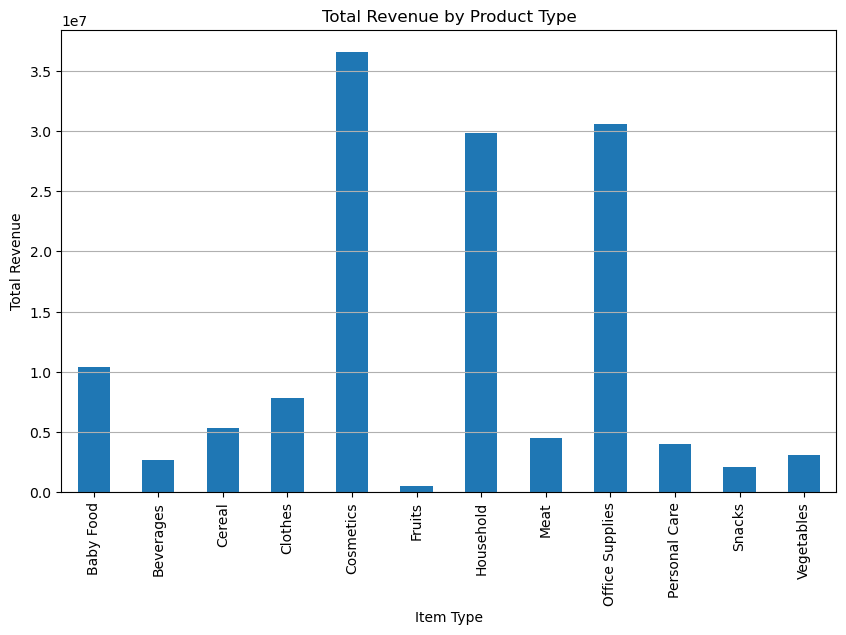

In [128]:
#bar chart Total Revenue by Product Type
totalrevenue_itemtype = data.groupby("Item Type")["Total Revenue"].sum()
print("totalrevenue_itemtype")
plt.figure(figsize=(10,6))
totalrevenue_itemtype.plot(kind='bar')
plt.title("Total Revenue by Product Type")
plt.xlabel("Item Type")
plt.ylabel("Total Revenue")
plt.grid(axis='y')

In [134]:
#Total Revenue by sales channel pie chart
totalrevenue_saleschannel = data.groupby("Sales Channel")["Total Revenue"].mean()

Text(0.5, 1.0, 'Total Revenue by sales channel')

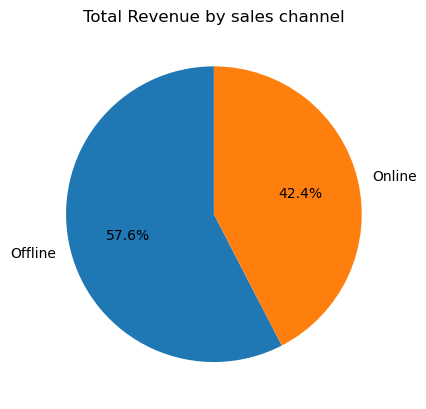

In [154]:
plt.pie(totalrevenue_saleschannel,labels=totalrevenue_saleschannel.index,startangle = 90, autopct="%1.1f%%")
plt.title("Total Revenue by sales channel")

In [160]:
#total cost by sales channel pie chart
totalcost_saleschannel = data.groupby("Sales Channel")["Total Cost"].mean()

Text(0.5, 1.0, 'total cost by sales channel')

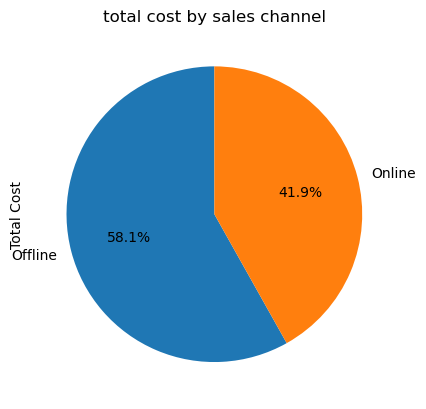

In [162]:
totalcost_saleschannel.plot(kind="pie", autopct = "%1.1f%%" ,startangle = 90)
plt.title("total cost by sales channel")

In [195]:
#region wise total unit sold donut 
unitsold_region = data.groupby("Region")["Units Sold"].sum()

Text(0.5, 1.0, 'Units Sold_by region')

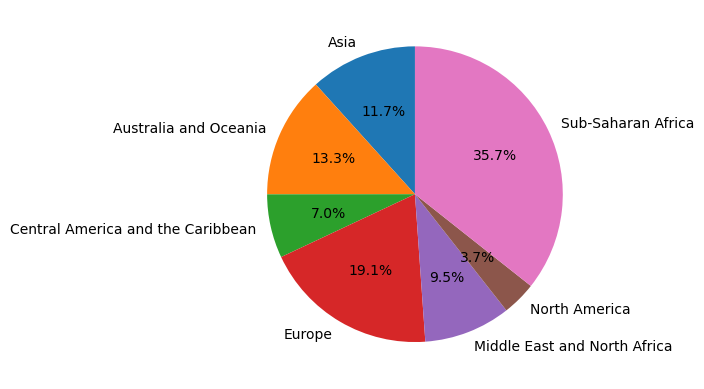

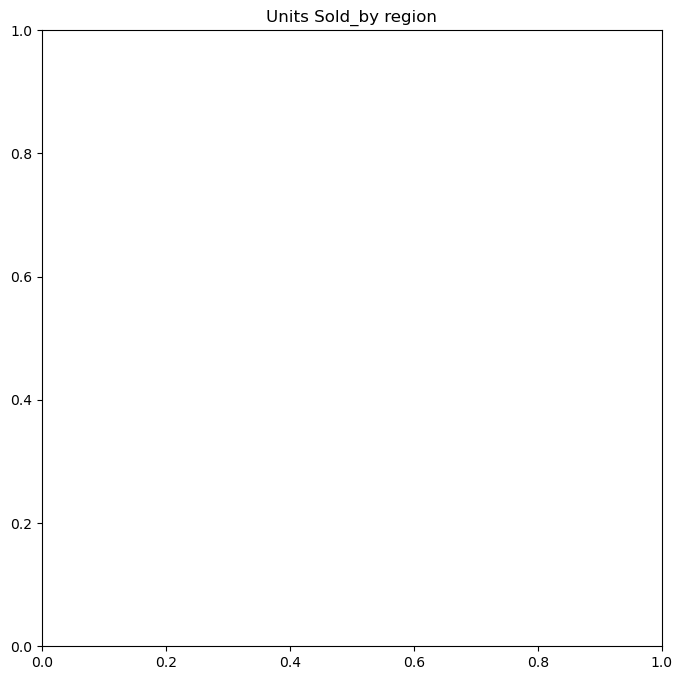

In [223]:
#region wise total unit sold donut 
unitsold_region = data.groupby("Region")["Units Sold"].sum()
plt.pie(unitsold_region, labels=unitsold_region.index, autopct = "%1.1f%%" ,startangle = 90,)
plt.figure(figsize=(8,8))

centre_circle = plt.Circle((0, 0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title("Units Sold_by region")
 

In [227]:
unitsold_yearmonth = data.groupby(["year","month"])["Units Sold"].sum()

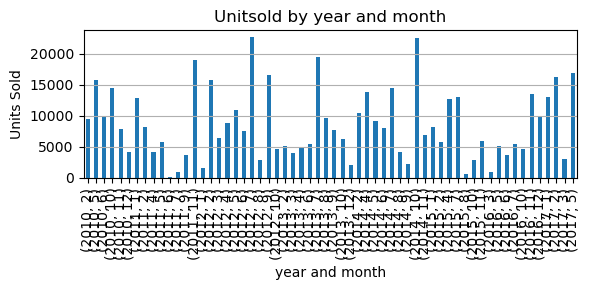

In [237]:
plt.figure(figsize=(6,3))
unitsold_yearmonth.plot(kind='bar')
plt.title("Unitsold by year and month")
plt.xlabel("year and month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.grid(axis='y')